In [48]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv("C:/Users/abhin/Downloads/data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [51]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [52]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [53]:
numeric_cols = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

In [54]:
df = df.drop('country', axis=1)

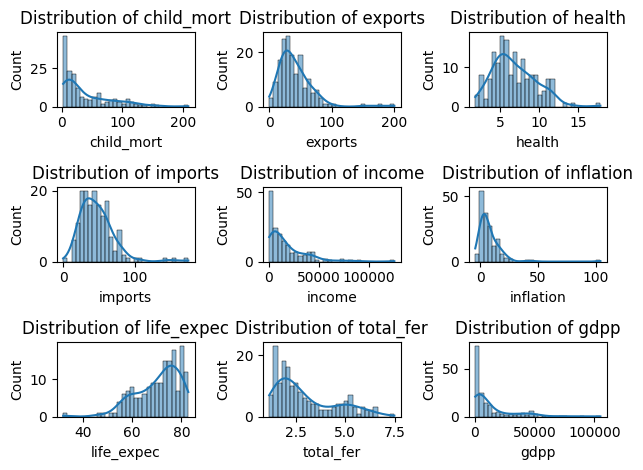

In [55]:
for i, feature in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [56]:
# removing outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

child_mort       53.850
exports          27.550
health            3.680
imports          28.550
income        19445.000
inflation         8.940
life_expec       11.500
total_fer         2.085
gdpp          12720.000
dtype: float64

In [57]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [58]:
# Scaling the numerical columns
scaled_data = df.copy()
for col in numeric_cols:
    mean = scaled_data[col].mean()
    std = scaled_data[col].std()
    scaled_data[col] = (scaled_data[col] - mean) / std

scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.513379,-1.459292,0.558046,-0.012778,-0.975962,0.341772,-1.821469,1.909527,-0.822330
1,-0.653605,-0.501589,0.092631,0.195423,-0.124795,-0.463729,0.891595,-0.935098,-0.327100
2,-0.338568,0.051751,-0.982794,-0.772430,0.179047,1.425536,0.918591,-0.089214,-0.275294
3,2.361329,1.323369,-1.579248,-0.125319,-0.537079,2.450719,-1.295054,2.141463,-0.405508
4,-0.839095,0.429512,-0.142336,0.775010,0.813329,-0.960047,0.959084,-0.607659,0.808416


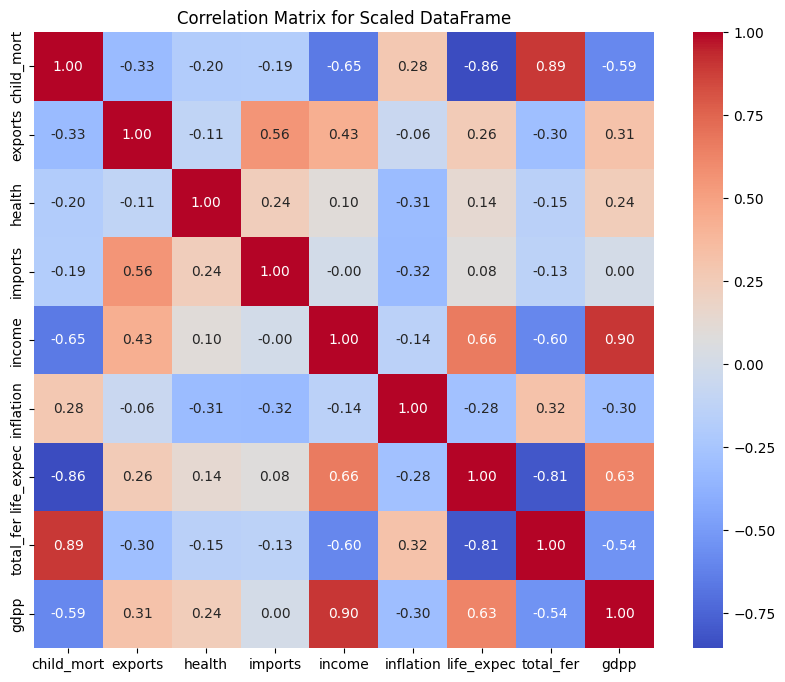

In [59]:
# Calculate the correlation matrix
corr_matrix = scaled_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Scaled DataFrame')
plt.show()

In [60]:
def get_highly_correlated_columns(correlation_matrix, threshold=0.8):
    """
    This function returns a list of tuples containing pairs of columns that are highly correlated.
    
    Parameters:
    correlation_matrix (pd.DataFrame): The correlation matrix of the dataframe.
    threshold (float): The threshold value above which columns are considered highly correlated.
    
    Returns:
    list: A list of tuples containing pairs of highly correlated columns.
    """
    correlated_columns = []
    for col in correlation_matrix.columns:
        for row in correlation_matrix.index:
            if col != row and abs(correlation_matrix.loc[row, col]) > threshold:
                correlated_columns.append((row, col))
    return correlated_columns

# Example usage
highly_correlated_columns = get_highly_correlated_columns(corr_matrix, threshold=0.8)
print(highly_correlated_columns)

[('life_expec', 'child_mort'), ('total_fer', 'child_mort'), ('gdpp', 'income'), ('child_mort', 'life_expec'), ('total_fer', 'life_expec'), ('child_mort', 'total_fer'), ('life_expec', 'total_fer'), ('income', 'gdpp')]


In [61]:
#There are some highly correlated features we can perform PCA to reduce the dimensionality of the data
#step 2: Calculate the covariance matrix
cov_matrix = np.cov(scaled_df.T)

# Step 3: Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort the eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Display the sorted eigenvalues and eigenvectors
print("Sorted Eigenvalues:")
print(sorted_eigenvalues)
print("\nSorted Eigenvectors:")
print(sorted_eigenvectors)

Sorted Eigenvalues:
[4.23545432 1.48203737 1.27514882 0.8088303  0.65174718 0.22155427
 0.16984742 0.09145006 0.06393025]

Sorted Eigenvectors:
[[-0.43903928  0.06281361  0.01980308  0.32953214  0.20834338  0.01676991
  -0.17970965 -0.76357355  0.18784846]
 [ 0.23003049  0.3405897   0.62207764  0.18544375 -0.00449918 -0.52759139
  -0.34465859  0.0339553  -0.10676716]
 [ 0.12597886  0.30739824 -0.61168522  0.35523949 -0.54778543 -0.24758517
  -0.15723842 -0.01414534  0.05468492]
 [ 0.12124919  0.7298262   0.20145887 -0.05945357 -0.14347541  0.54926048
   0.26837887 -0.10777501  0.05115679]
 [ 0.40836786 -0.22379393  0.13617362  0.43146995  0.07481406  0.08446092
   0.18422533  0.0933589   0.72322662]
 [-0.19959414 -0.38284228  0.41656727  0.11184636 -0.75752643  0.16451906
   0.07887308 -0.10353465 -0.09850315]
 [ 0.42633215 -0.15186146 -0.04490783 -0.28671888 -0.07532997  0.37681234
  -0.71762729 -0.20980599  0.06545947]
 [-0.42146374  0.07793467  0.03646846  0.41531936  0.11385358  0.

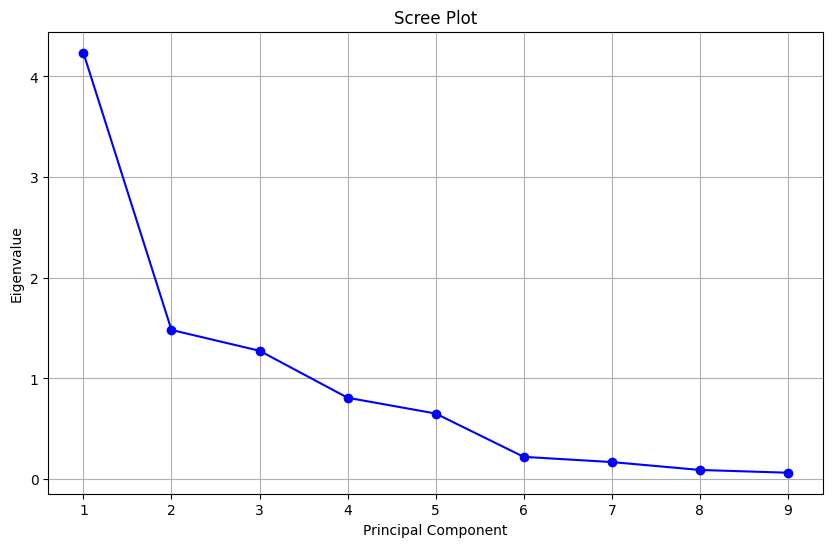

In [62]:
# Create a scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, 'o-', color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, len(sorted_eigenvalues) + 1))
plt.grid(True)
plt.show()


In [63]:
# Step 5: Select first 5 eigenvectors (principal components)
n_components = 5
selected_eigenvectors = sorted_eigenvectors[:, :n_components]

# Step 6: Transform the data using the selected eigenvectors
# Final data set = Principal components * standardized original dataset
df_pca = scaled_df.dot(selected_eigenvectors)

# Calculate the explained variance ratio for each principal component
explained_variance_ratio = sorted_eigenvalues[:9] / np.sum(sorted_eigenvalues)

# Print the explained variance ratio
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.2f} of the variance")

Principal Component 1: 0.47 of the variance
Principal Component 2: 0.16 of the variance
Principal Component 3: 0.14 of the variance
Principal Component 4: 0.09 of the variance
Principal Component 5: 0.07 of the variance
Principal Component 6: 0.02 of the variance
Principal Component 7: 0.02 of the variance
Principal Component 8: 0.01 of the variance
Principal Component 9: 0.01 of the variance


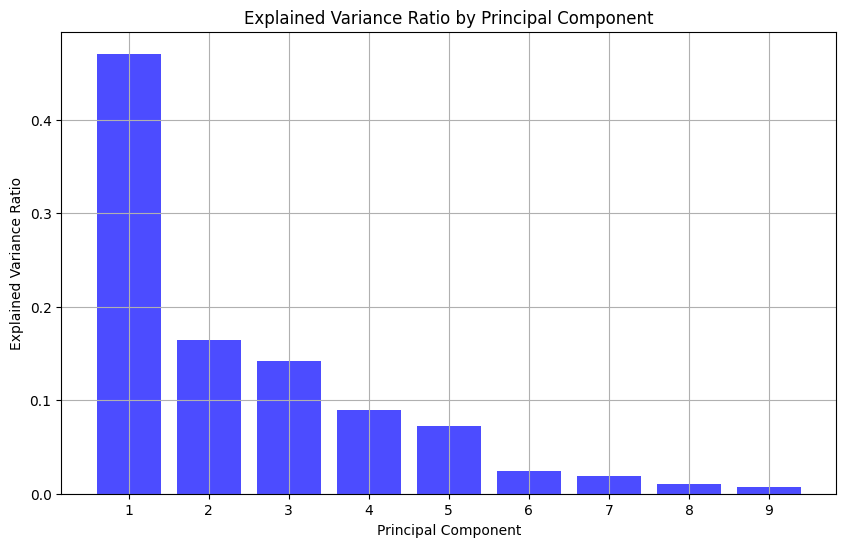

In [64]:
# Create a bar plot for explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='blue', alpha=0.7)
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

In [65]:
class kMeansClustering:

    def __init__(self, k=3, random_state=42):
        self.k = k
        self.centroids = None
        self.inertia_ = None
        self.random_state = random_state

    def euclidean_distance(self, x1, x2):
        x1 = np.array(x1, dtype=np.float64)
        x2 = np.array(x2, dtype=np.float64)
        return np.linalg.norm(x1 - x2)

    def fit(self, X, max_iter=100):
        self.X = X
        # Ensure X is a numpy array with numeric type
        X = np.array(X, dtype=np.float64)

        # Set the random seed for reproducibility
        np.random.seed(self.random_state)

        # Initialize centroids randomly between axis min and max
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, X.shape[1]))

        for _ in range(max_iter):
            # Assign clusters
            y = np.array([np.argmin([self.euclidean_distance(data_point, centroid) for centroid in self.centroids]) for data_point in X])

            # Calculate new centroids
            new_centroids = np.array([np.mean(X[y == i], axis=0) if len(X[y == i]) > 0 else self.centroids[i] for i in range(self.k)])

            # Check for convergence
            if np.all(np.abs(self.centroids - new_centroids) < 0.0001):
                break

            self.centroids = new_centroids

        # Calculate inertia (sum of squared distances from points to their centroids)
        self.inertia_ = np.sum([np.linalg.norm(data_point - self.centroids[y[i]]) ** 2 for i, data_point in enumerate(X)])

        return y

    def fit_predict(self, X, max_iter=100):
        return self.fit(X, max_iter)


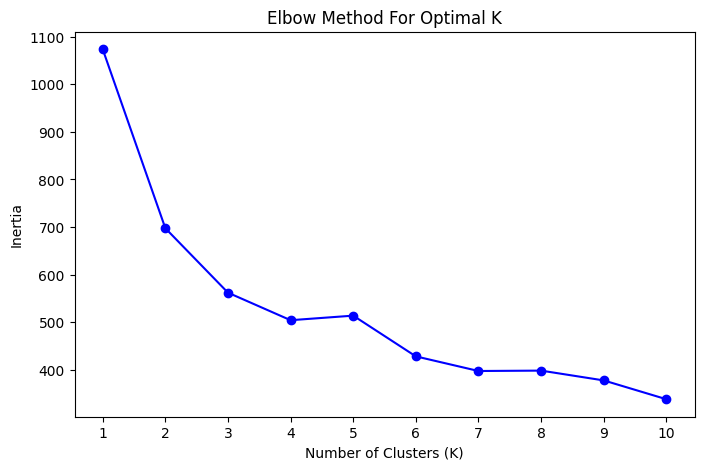

In [66]:
# Elbow Method
def plot_elbow_method(data, max_k=10):
    inertia = []
    K_range = range(1, max_k + 1)
    for k in K_range:
        kmeans = kMeansClustering(k)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(K_range, inertia, 'bo-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal K')
    plt.xticks(K_range)
    plt.show()

plot_elbow_method(df_pca)

K=2, Silhouette Score=0.2781
K=3, Silhouette Score=0.2234
K=4, Silhouette Score=0.2232
K=5, Silhouette Score=0.2207
K=6, Silhouette Score=0.2207
K=7, Silhouette Score=0.2240
K=8, Silhouette Score=0.2001
K=9, Silhouette Score=0.2169
K=10, Silhouette Score=0.1865


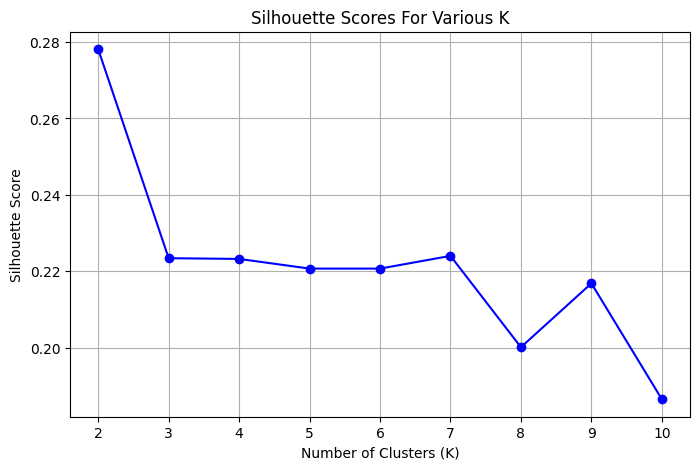

In [67]:
def silhouette_score(data, cluster_labels):
    n = len(data)
    s = 0  # Total silhouette score
    unique_labels = set(cluster_labels)  # Get unique cluster labels

    for i in range(n):
        # Points belonging to the same cluster as i
        same_cluster = [data[j] for j in range(n) if cluster_labels[j] == cluster_labels[i]]
        # Points belonging to other clusters
        other_clusters = [data[j] for j in range(n) if cluster_labels[j] != cluster_labels[i]]

        # Calculate a_i: average distance to all other points in the same cluster
        same_cluster_distances = [sum((data[i][d] - point[d]) ** 2 for d in range(len(data[i]))) ** 0.5 for point in same_cluster if point != data[i]]
        a_i = sum(same_cluster_distances) / len(same_cluster_distances) if same_cluster_distances else 0

        # Calculate b_i: average distance to all points in the nearest different cluster
        b_i = float('inf')  # Start with a large value for b_i

        for label in unique_labels:
            if label != cluster_labels[i]:
                other_cluster_points = [data[j] for j in range(n) if cluster_labels[j] == label]
                other_cluster_distances = [sum((data[i][d] - point[d]) ** 2 for d in range(len(data[i]))) ** 0.5 for point in other_cluster_points]
                b_i = min(b_i, sum(other_cluster_distances) / len(other_cluster_distances))

        # Update silhouette score
        if a_i == 0 and b_i == 0:
            continue
        s += (b_i - a_i) / max(a_i, b_i)

    return s / n

def plot_silhouette_scores(data, max_k=10):
    silhouette_avgs = []
    K_range = range(2, max_k + 1)  # Silhouette score is undefined for K=1

    for k in K_range:
        kmeans = kMeansClustering(k)
        cluster_labels = kmeans.fit_predict(data)  # Get the predicted cluster labels
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_avgs.append(silhouette_avg)
        print(f'K={k}, Silhouette Score={silhouette_avg:.4f}')

    # Plot the silhouette scores for different values of K
    plt.figure(figsize=(8, 5))
    plt.plot(K_range, silhouette_avgs, 'bo-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores For Various K')
    plt.xticks(K_range)
    plt.grid(True)
    plt.show()

plot_silhouette_scores(scaled_df.values.tolist())

In [68]:
#silhoutte scores suggest that K = 2 is the best number of clusters
Kmeans = kMeansClustering(k=2, random_state=42)
cluster_labels = Kmeans.fit_predict(df_pca.values)
cluster_labels

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

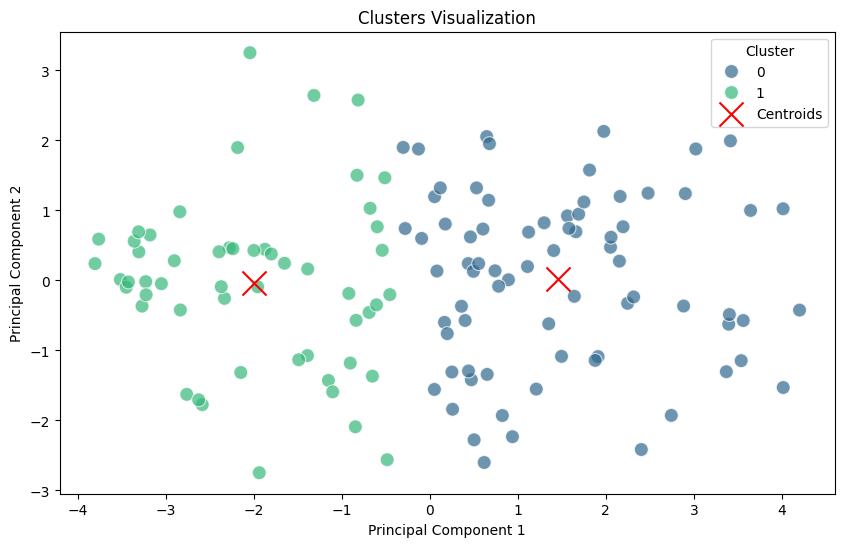

In [69]:
# Fit the KMeans model to the PCA-transformed data
cluster_labels = Kmeans.fit_predict(df_pca)

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[0], y=df_pca[1], hue=cluster_labels, palette='viridis', s=100, alpha=0.7)

# Mark the centroids
centroids = Kmeans.centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x', label='Centroids')

plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [70]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_pca, cluster_labels, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (89, 5)
X_test shape: (39, 5)
y_train shape: (89,)
y_test shape: (39,)


In [71]:
class KNearestNeighbors:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        X = np.array(X)
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

In [72]:
knn = KNearestNeighbors(k=5)
knn.fit(X_train, y_train)
Predictions = knn.predict(X_test)
Predictions

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1])

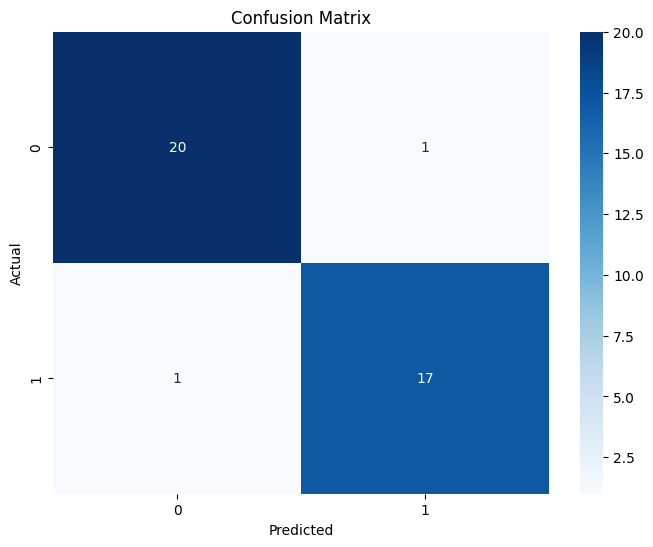

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, Predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [74]:
# Calculate true positives, false positives, false negatives, and true negatives
TP = np.sum((Predictions == 1) & (y_test == 1))
FP = np.sum((Predictions == 1) & (y_test == 0))
FN = np.sum((Predictions == 0) & (y_test == 1))
TN = np.sum((Predictions == 0) & (y_test == 0))

# Calculate accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)

# Calculate precision
precision = TP / (TP + FP) if (TP + FP) > 0 else 0

# Calculate recall
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

# Calculate F1 score (correct formula)
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9487
Precision: 0.9444
Recall: 0.9444
F1 Score: 0.9444


In [75]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=df_pca[0], y=df_pca[1], hue=cluster_labels_hierarchical, palette='viridis', s=100, alpha=0.7)
# plt.title('Hierarchical Clusters Visualization (Custom)')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(title='Cluster')
# plt.show()

In [76]:
class HierarchicalClustering:
    def __init__(self, k=3, linkage='single'):
        self.k = k
        self.linkage = linkage
        self.clusters = None

    def euclidean_distance(self, x1, x2):
        return np.linalg.norm(x1 - x2)

    def single_linkage(self, cluster1, cluster2):
        return min(self.euclidean_distance(x1, x2) for x1 in cluster1 for x2 in cluster2)

    def complete_linkage(self, cluster1, cluster2):
        return max(self.euclidean_distance(x1, x2) for x1 in cluster1 for x2 in cluster2)

    def average_linkage(self, cluster1, cluster2):
        return sum(self.euclidean_distance(x1, x2) for x1 in cluster1 for x2 in cluster2) / (len(cluster1) * len(cluster2))

    def ward_linkage(self, cluster1, cluster2, X):
        # Calculate centroids of the two clusters
        centroid1 = np.mean(X[cluster1], axis=0)
        centroid2 = np.mean(X[cluster2], axis=0)

        # Calculate the sum of squared differences from the centroids
        dist = np.linalg.norm(centroid1 - centroid2) ** 2
        return dist

    def fit(self, X):
        # Initialize each data point as its own cluster (each data point is an index)
        self.clusters = [[i] for i in range(len(X))]

        while len(self.clusters) > self.k:
            min_distance = float('inf')
            closest_clusters = (0, 1)

            for i in range(len(self.clusters)):
                for j in range(i + 1, len(self.clusters)):
                    if self.linkage == 'single':
                        distance = self.single_linkage(self.clusters[i], self.clusters[j])
                    elif self.linkage == 'complete':
                        distance = self.complete_linkage(self.clusters[i], self.clusters[j])
                    elif self.linkage == 'average':
                        distance = self.average_linkage(self.clusters[i], self.clusters[j])
                    elif self.linkage == 'ward':
                        distance = self.ward_linkage(self.clusters[i], self.clusters[j], X)

                    if distance < min_distance:
                        min_distance = distance
                        closest_clusters = (i, j)

            i, j = closest_clusters
            # Merge clusters
            self.clusters[i].extend(self.clusters[j])
            self.clusters.pop(j)

        return self.clusters

    def fit_predict(self, X):
        self.fit(X)
        cluster_labels = np.zeros(len(X))

        # Assign cluster labels based on final clusters
        for i, cluster in enumerate(self.clusters):
            for index in cluster:  # 'index' represents the index of the data points
                cluster_labels[index] = i

        return cluster_labels


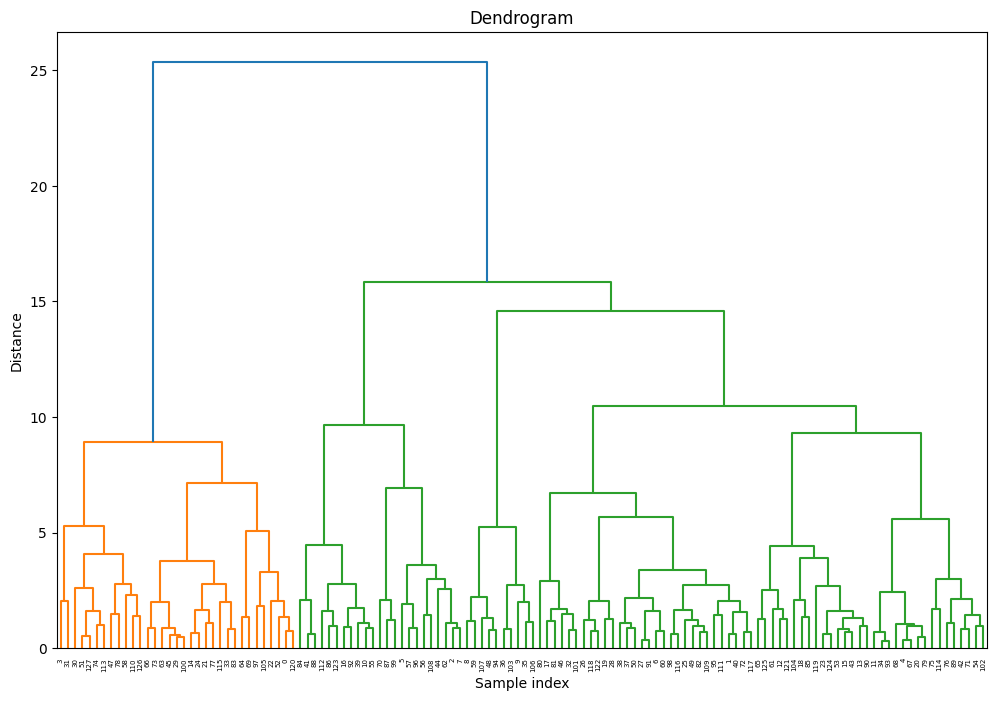

In [77]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical/agglomerative clustering
Z = linkage(df_pca, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
# Perform hierarchical clustering using the custom HierarchicalClustering class
hierarchical_clustering = HierarchicalClustering(k=2, linkage='ward')
cluster_labels_hierarchical = hierarchical_clustering.fit_predict(df_pca.values)

In [78]:
#Perform hierarchical clustering from scratch using the custom HierarchicalClustering class
hierarchical_clustering = HierarchicalClustering(k=2, linkage='ward')
cluster_labels_hierarchical = hierarchical_clustering.fit_predict(df_pca.values)

# Display the cluster labels
print(cluster_labels_hierarchical)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


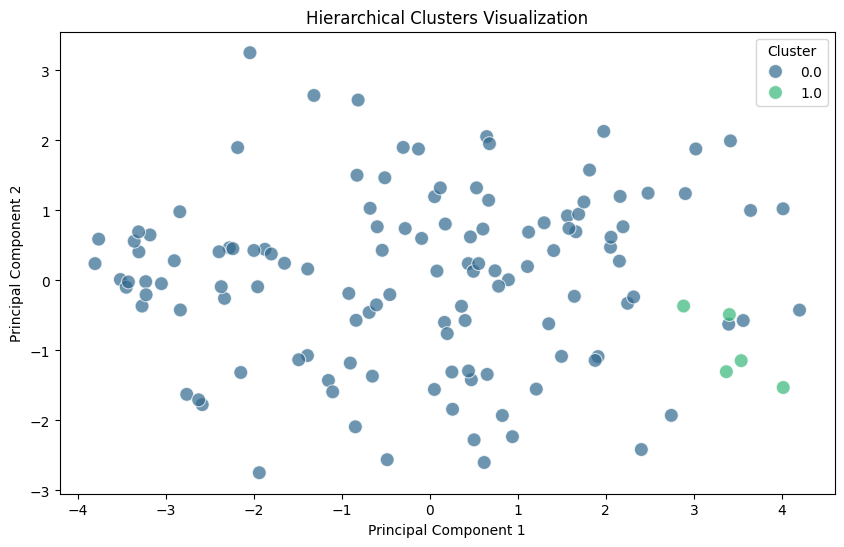

In [79]:
# Create a scatter plot of the custom hierarchical clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[0], y=df_pca[1], hue=cluster_labels_hierarchical, palette='viridis', s=100, alpha=0.7)
plt.title('Hierarchical Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [80]:
sil_score = silhouette_score(df_pca.values.tolist(), cluster_labels_hierarchical)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.2538146438290659


In [81]:
from sklearn.model_selection import train_test_split

# Split the hierarchical clustering labels and PCA-transformed data into training and testing sets
X_train_hierarchical, X_test_hierarchical, y_train_hierarchical, y_test_hierarchical = train_test_split(df_pca, cluster_labels_hierarchical, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("X_train_hierarchical shape:", X_train_hierarchical.shape)
print("X_test_hierarchical shape:", X_test_hierarchical.shape)
print("y_train_hierarchical shape:", y_train_hierarchical.shape)
print("y_test_hierarchical shape:", y_test_hierarchical.shape)

X_train_hierarchical shape: (89, 5)
X_test_hierarchical shape: (39, 5)
y_train_hierarchical shape: (89,)
y_test_hierarchical shape: (39,)


In [ ]:
Knn2 = KNearestNeighbors(k=5)
Knn2.fit(X_train_hierarchical, y_train_hierarchical)
Predictions_hierarchical = Knn2.predict(X_test_hierarchical)
Predictions_hierarchical

C:\Users\abhin\AppData\Local\Temp\ipykernel_10804\2336030615.py:25: DeprecationWarning: Non-integer input passed to bincount. In a future version of NumPy, this will be an error. (Deprecated NumPy 2.1)
  most_common = np.bincount(k_nearest_labels).argmax()


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

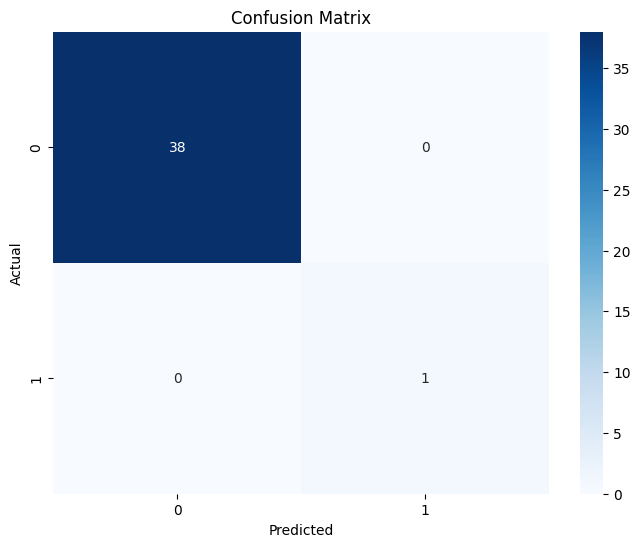

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test_hierarchical, Predictions_hierarchical)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [87]:
# Calculate true positives, false positives, false negatives, and true negatives
TP = np.sum((Predictions_hierarchical == 1) & (y_test_hierarchical == 1))
FP = np.sum((Predictions_hierarchical == 1) & (y_test_hierarchical == 0))
FN = np.sum((Predictions_hierarchical == 0) & (y_test_hierarchical == 1))
TN = np.sum((Predictions_hierarchical == 0) & (y_test_hierarchical == 0))

# Calculate accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)

# Calculate precision
precision = TP / (TP + FP) if (TP + FP) > 0 else 0

# Calculate recall
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

# Calculate F1 score (correct formula)
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
